In [1]:
import sys
sys.path.append("../src")

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from exact_solution import solve_master_equation, one_excited_emitter_state

In [24]:
aqt_results = pd.read_csv("../data/AQT/QMarina-AQT-4Q.csv", index_col=0)
aqt_results = aqt_results.set_index(["Time", "Protocol", "Randomizations", "Identities"])

# renormalize in the 1-excitation subspace; average emitter 2 and 3
raw_data_norm = aqt_results.copy()
raw_data_norm[['1000', '0100', '0010', '0001']] = raw_data_norm[['1000', '0100', '0010', '0001']].divide(raw_data_norm[['1000', '0100', '0010', '0001']].sum(axis=1), axis=0)
raw_data_norm['avg_0100_0010'] = raw_data_norm[['0100', '0001']].mean(axis=1)

aqt_bitstrs = {
    "Emitter 1": "1000",
    "Emitter 2 and 3": "avg_0100_0010",
    "Cavity + Environment": "0010",
}

In [25]:
N = 3
g = 4
kappa = 2
times = np.linspace(0, 3, 101)

In [26]:
initial_state = one_excited_emitter_state(N, 1)
qutip_results = solve_master_equation(N, g, kappa, initial_state, times)
qutip_results["Emitter 2 and 3"] = qutip_results["Emitter 2"]

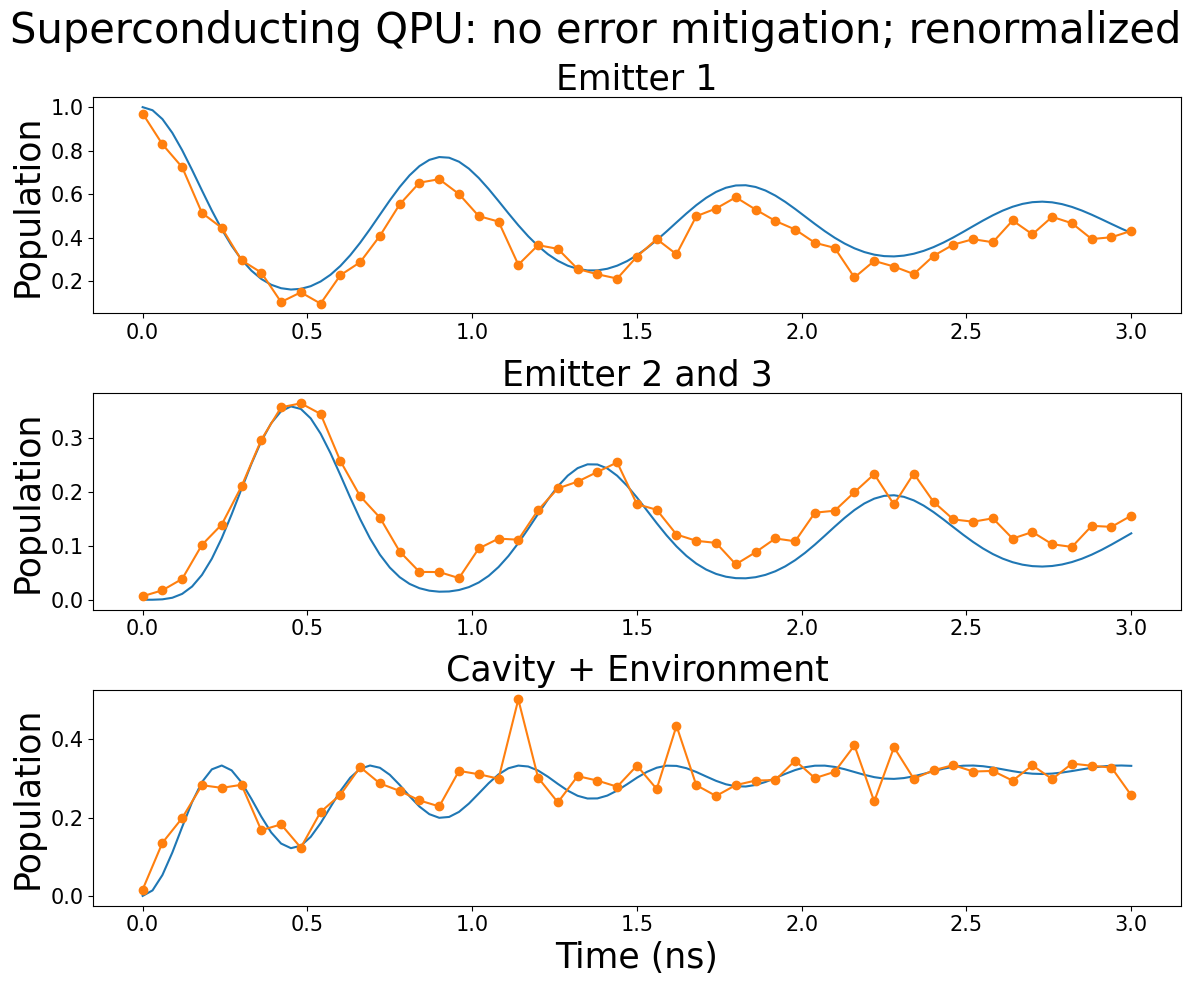

In [27]:
# Plot the RAW (no mitigation) data
fig, axes = plt.subplots(3, 1, figsize=(12, 10))

for a, column in zip(axes.flatten(), aqt_bitstrs.keys()):
    a.set_title(column, fontsize=25)
    a.plot(qutip_results.index, qutip_results[column], label="QuTiP")

    aqt_raw = raw_data_norm.xs("RAW", level="Protocol")
    times = aqt_raw.index.get_level_values("Time")
    aqt_column = aqt_bitstrs[column]
    a.plot(times, aqt_raw[aqt_column], marker='o', label="QPU")

    a.tick_params(axis='x', labelsize=15)
    a.tick_params(axis='y', labelsize=15)

    a.set_ylabel("Population", fontsize=25)

axes[-1].set_xlabel("Time (ns)", fontsize=25)

# axes[1][0].set_ylabel("Population", fontsize=25)

# axes[0][0].set_xticklabels([])
# axes[0][1].set_xticklabels([])

fig.suptitle("Superconducting QPU: no error mitigation; renormalized", fontsize=30)
plt.tight_layout()


In [23]:
fig.savefig("../figures/AQT_raw_normed.eps", bbox_inches="tight")